In [252]:
# import relevant modules
import os
import sys
import time
from importlib import reload
import numpy as np
import matplotlib as mpl
from scipy.linalg import logm, expm
from qutip import destroy, identity, tensor, qeye, Qobj, fidelity, basis

# locate directory containing scripts 
current_directory = os.getcwd() 
src_directory = os.path.dirname(current_directory) + '/src'
sys.path.append(src_directory)

# import custom module
import spin_chain
import GSP_operators
from simulate_algorithm import format_number
reload(spin_chain)
reload(GSP_operators)

# define 2-site identity
I2 = qeye(2)

# font specs for plots
# %matplotlib inline
mpl.rcParams["font.family"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.size"] = "14"

In [136]:
# specify parameters of 2-site spin chain
N2 = 2
Jx = 1
Jy = 1
Jz = 1
periodic_bc = False
tolerance = 1e-12

# calculate spin chain quantities
# calculate spin chain quantities
H2, _, _, _, _, _ = spin_chain.properties(N2, Jx, Jy, Jz, periodic_bc, tolerance)

In [137]:
# specify parameters for spin chain (number of sites, coupling constants, 
# periodic or nonperiodic boundary conditions,  and tolerance 
# with which to determine orthonormality of eigenstates
N = 4
periodic_bc = True
tolerance4 = 1e-12

# collect properties of spin chain
H4, H4_list, eigenstates4, eigenvalues4, E_0, ρ_ground_state4 = \
    spin_chain.properties(N, Jx, Jy, Jz, periodic_bc, tolerance4)

In [138]:
# define functions for displacement operators weighted by A
D12_A = lambda α: GSP_operators.D12_A(α, H2, E_0, cutoff)
D34_A = lambda α: GSP_operators.D34_A(α, H2, E_0, cutoff)

# define functions for displacement operators weighted by B
D23_B = lambda α: GSP_operators.D23_B(α, H2, E_0, cutoff)
D41_B = lambda α: GSP_operators.D41_B(α, H2, E_0, cutoff)

# define functions for displacement operators weighted by C
D34_C = lambda α: GSP_operators.D34_C(α, H2, E_0, cutoff)
D12_C = lambda α: GSP_operators.D12_C(α, H2, E_0, cutoff)

# define functions for displacement operators weighted by D
D41_D = lambda α: GSP_operators.D41_D(α, H2, E_0, cutoff)
D23_D = lambda α: GSP_operators.D23_D(α, H2, E_0, cutoff)

# define GSP operator 
GSP = lambda α: GSP_operators.GSP(α, H2, E_0, cutoff)

# $\text{Verify GSP }$

In [ ]:
# define cutoff
cutoff = 3

# define operators for bosonic modes 
a = destroy(cutoff)
Ib = identity(cutoff)

# define local Hamiltonians
A = H12 = H4_list[0]
B = H23 = H4_list[1]
C = H34 = H4_list[2]
D = H41 = H4_list[3]

# define operators in argument of matrix exponentials 
α = 0.1
α_arg = α*a.dag() - np.conj(α)*a

# can also use *tuple([Ib]*N) for repeated Ib's
α1 = tensor([α_arg, Ib, Ib, Ib])
α2 = tensor([Ib, α_arg, Ib, Ib])
α3 = tensor([Ib, Ib, α_arg, Ib])
α4 = tensor([Ib, Ib, Ib, α_arg])

In [ ]:
# display method of exponentiating bosonic matrices 
# that contain tensor products of identities
display(α1.expm() == (tensor(α_arg, Ib, Ib, Ib)).expm() == tensor(α_arg.expm(), Ib, Ib, Ib))
display(α2.expm() == (tensor(Ib, α_arg, Ib, Ib)).expm() == tensor(Ib, α_arg.expm(), Ib, Ib))
display(α3.expm() == (tensor(Ib, Ib, α_arg, Ib)).expm() == tensor(Ib, Ib, α_arg.expm(), Ib))
display(α4.expm() == (tensor(Ib, Ib, Ib, α_arg)).expm() == tensor(Ib, Ib, Ib, α_arg.expm()))

In [ ]:
# display how you can factor bosonic matrix exponentials 
# into products of matrix exponentials
display((α1 + α2).expm() == tensor(α_arg, Ib, Ib, Ib).expm()*tensor(Ib, α_arg, Ib, Ib).expm() == \
                            tensor(α_arg.expm(), α_arg.expm(), Ib, Ib))
display((α2 + α3).expm() == tensor(Ib, α_arg, Ib, Ib).expm()*tensor(Ib, Ib, α_arg, Ib).expm() == \
                            tensor(Ib, α_arg.expm(), α_arg.expm(), Ib))
display((α3 + α4).expm() == tensor(Ib, Ib, α_arg, Ib).expm()*tensor(Ib, Ib, Ib, α_arg).expm() == \
                            tensor(Ib, Ib, α_arg.expm(), α_arg.expm()))
display((α4 + α1).expm() == tensor(Ib, Ib, Ib, α_arg).expm()*tensor(α_arg, Ib, Ib, Ib).expm() == \
                            tensor(α_arg.expm(), Ib, Ib, α_arg.expm()))

In [ ]:
# display method of exponentiating Hamiltonians that 
# involve tensor products of identities
display(A.expm() == H12.expm() == tensor(H2, I2, I2).expm() == tensor(H2.expm(), I2, I2))
display(B.expm() == H23.expm() == tensor(I2, H2, I2).expm() == tensor(I2, H2.expm(), I2))
display(C.expm() == H34.expm() == tensor(I2, I2, H2).expm() == tensor(I2, I2, H2.expm()))
display(D.expm() == H41.expm() == tensor(H2, I2, I2).permute([0, 3, 2, 1]).expm() == \
                                  tensor(H2.expm(), I2, I2).permute([0, 3, 2, 1]))

In [ ]:
# evaluate functions for displacements operators weighted by A
display(D12_A(α) == (tensor(α1 + α2, A)).expm())
display(D34_A(α) == (tensor(α3 + α4, A)).expm())

# evaluate functions for displacements operators weighted by B
display(D23_B(α) == (tensor(α2 + α3, B)).expm())
display(D41_B(α) == (tensor(α4 + α1, B)).expm())

# evaluate functions for displacements operators weighted by C
display(D34_C(α) == (tensor(α3 + α4, C)).expm())
display(D12_C(α) == (tensor(α1 + α2, C)).expm())

# evaluate functions for displacements operators weighted by D
display(D41_D(α) == (tensor(α4 + α1, D)).expm())
display(D23_D(α) == (tensor(α2 + α3, D)).expm())

# $\text{Simulations with cutoff = 3}$

In [119]:
# define cutoff and identity matrix for system
cutoff = 3
I = qeye([3]*4 + [2]*4)

# define array over which we will sweep α
α_start = 0
α_end = 1
α_steps = 100
α_array = np.linspace(α_start, α_end, α_steps)

start_time = time.time()
GSP_list3 = [GSP(α) for α in α_array]
total_time = time.time() - start_time
print(f'{total_time} seconds')

12.04797101020813 seconds


$$ \Large \text{GSP}(\alpha, \lambda, E_0) = e^{i \hat{H}_{\text{eff}}(\alpha)}$$

In [120]:
# verify that all GSP operators are unitary 
unitary_bool_list = []
rtol = 0 
atol = 1e-9
for U in GSP_list3: 
    unitary_bool_list.append(np.allclose(U*U.dag(), I, rtol=rtol, atol=atol))
    
if all(unitary_bool_list): 
    print('All GSP operators are unitary!')
else: 
    print('At least one GSP operator is not unitary')

All GSP operators are unitary!


$$ \Large  \hat{H}_\text{eff}(\alpha) = \frac{log(\text{GSP}(\alpha, \lambda, E_0))}{i}$$

In [121]:
# compute list of effective Hamiltonians
H_eff_list3 = [np.round(logm(U)/1j, 12) for U in GSP_list3]

$$ \Large  \text{GSP}(\alpha, \lambda, E_0) = e^{i \left( \frac{log(\text{GSP}(\alpha, \lambda, E_{0})}{i} \right)}$$

In [122]:
# verify that you can re-exponentiate effective Hamiltonians to recover original GSP 
all([np.allclose(expm(1j*H_eff), U, rtol = rtol, atol = atol) for H_eff, U in zip(H_eff_list3, GSP_list3)])

True

$$ \Large \hat{H}_{\text{eff}}(\alpha) = \hat{H}^{\dagger}_{\text{eff}}(\alpha)$$

In [123]:
# verify that each H_eff is Hermitian
all([np.allclose(H_eff, H_eff.conj().T, rtol = rtol, atol = atol) for H_eff in H_eff_list3])

True

In [124]:
# diagonalize each H_eff and record its eigenvalues
# and eigenstates
eigvals_array, eigenstates_array = [], []
for H_eff in H_eff_list3: 
    eigvals, eigenstates = Qobj(H_eff).eigenstates()
    eigvals_array.append(eigvals)
    eigenstates_array.append(eigenstates)

In [238]:
# verify that 
eigvals_array = np.array(eigvals_array)
if np.all(eigvals_array.imag < 1e-11): 
    print('Eigenvalues are effectively real!')
else: 
    print('There is at least one eigenvalue ' \
          + 'that is not effectively real')

Eigenvalues are effectively real!


In [240]:
k_start = 0
k_end = 3
k_steps = 1

k_list = list(range(k_start, k_end + 1, k_steps))
k_length = len(k_list)

# round each eigenvalue to 8 decimal places and extract only unique eigenvalues
eigenenergies_real_list = [sorted(set(np.round(re_eigvals, 8)))[k_start:k_end + 1: k_steps] \
                           for re_eigvals in eigvals_array.real]

eigenenergies_imag_list = [sorted(set(np.round(im_eigvals, 8)))[k_start:k_end + 1: k_steps] \
                           for im_eigvals in eigvals_array.imag]

In [241]:
# verify whether number of unique effective 
# eigenenergies is the same for each α
if eigenenergies_list[0] == [0]: 
    if len(set(len(x) for x in eigenenergies_list[1:])) == 1: 
        print('Number of unique effective eigenenergies is constant!')
    else: 
        print('Number of unique effective eigenenergies is not constant :(')
else: 
    if len(set(len(x) for x in eigenenergies_list)) == 1: 
        print('Number of unique effective eigenenergies isconstant!')
    else: 
        print('Number of unique effective eigenenergies is not constant :(')
        
eigenenergies_real_array = np.array(eigenenergies_real_list[1:])
eigenenergies_imag_array = np.array(eigenenergies_imag_list[1:])

Number of unique effective eigenenergies is constant!


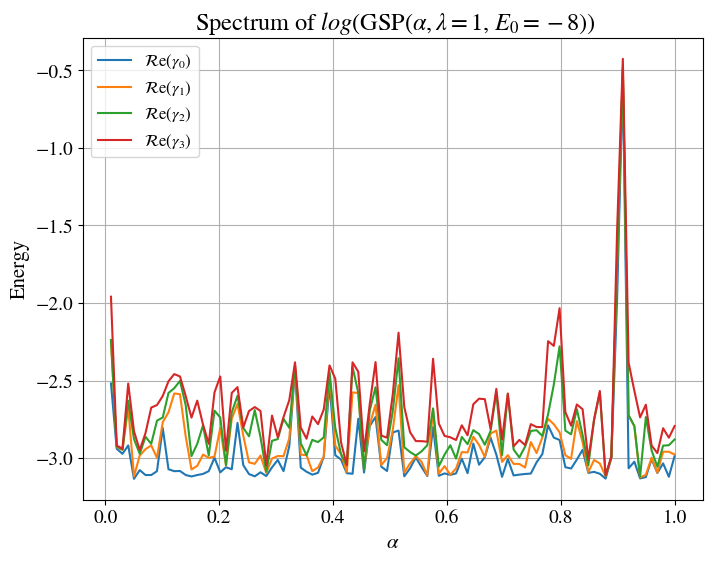

In [250]:
fig, ax = plt.subplots(figsize=(8, 6))
if Jx == Jy: 
    λ = Jz/Jz
    
title_str = r' Spectrum of $ log(\mathrm{{GSP}} $' \
              + fr'$(\alpha, \lambda = {format_number(λ)}$, ' \
              + fr'$E_0 = {format_number(E_0)}))$'

# Generate unique colors to use for plotting
colors = ['red', 'green', 'lightblue', 'orange', 'purple', \
          'magenta', 'pink', 'gray', 'cyan', 'coral', \
          'black', 'silver', 'olive', 'teal', 'maroon', 'blue']
    
for i in range(k_length):
    ax.plot(α_array[1:], eigenenergies_real_array[:, i], \
            label = f'$\mathcal{{Re}}(\gamma_{{{i}}})$')
    ax.set_xlabel(r'$\alpha$', fontsize=15)
    ax.set_xlabel(r'$\alpha$', fontsize=15)
    ax.set_ylabel('Energy', fontsize=15)
    ax.set_title(title_str, fontsize=17.5)
    ax.legend(fontsize = 12)
    ax.grid(True)